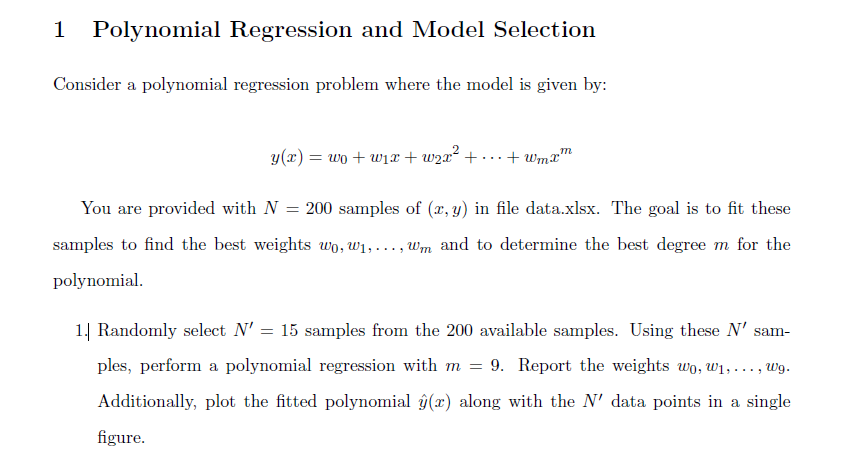

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
file_path = 'C:/Users/fatem/Downloads/QuantCodes/data.xlsx'
data = pd.read_excel(file_path)
data.head(10)

,x,y
0,1.486796,14.260397
1,-0.626706,4.251829
2,-1.059933,6.990074
3,1.504698,15.567678
4,0.607124,0.053998
5,-0.491183,7.432851
6,-1.837546,-6.131201
7,1.879448,22.595981
8,1.520632,12.148726
9,-0.283459,3.765365


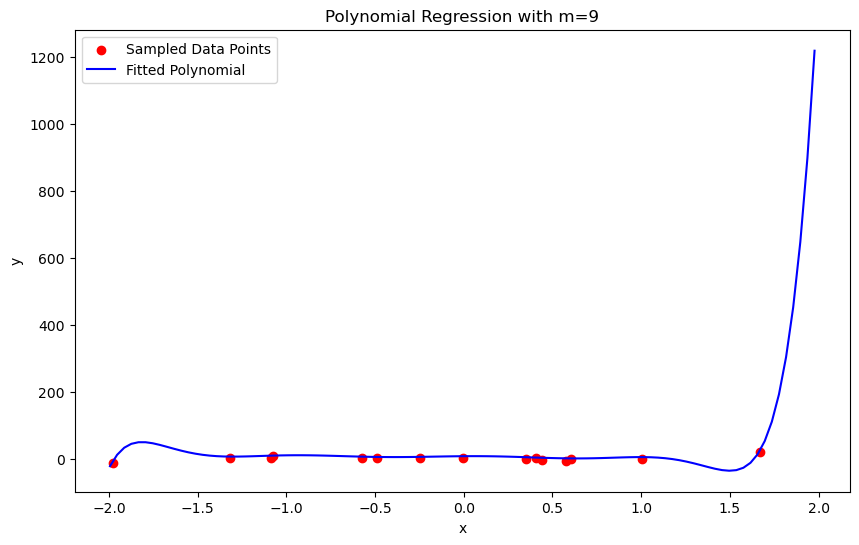

In [76]:
# Step 1: Randomly select N' = 15 samples
N_prime = 15
sampled_data = data.sample(N_prime, random_state=1)
x_sampled = sampled_data['x'].values
y_sampled = sampled_data['y'].values

# Step 2: Perform polynomial regression with m = 9
poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(x_sampled.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y_sampled)

# Get the weights
weights = model.coef_
weights[0] = model.intercept_

# Step 3: Report the weights
weights_report = {f'w{i}': weight for i, weight in enumerate(weights)}

# Step 4: Plot the fitted polynomial along with the data points
x_range = np.linspace(data['x'].min(), data['x'].max(), 100)
X_range_poly = poly.transform(x_range.reshape(-1, 1))
y_range_pred = model.predict(X_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Data Points')
plt.plot(x_range, y_range_pred, color='blue', label='Fitted Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with m=9')
plt.legend()
plt.show()



In [58]:
weights_report

{'w0': 4.617020554398868,
 'w1': 4.082452590314581,
 'w2': -31.780574290970023,
 'w3': -47.231656016071774,
 'w4': 79.07670101054129,
 'w5': 81.03022654726962,
 'w6': -60.80906243545982,
 'w7': -50.147679434088744,
 'w8': 13.472428776107119,
 'w9': 9.622762071831957}

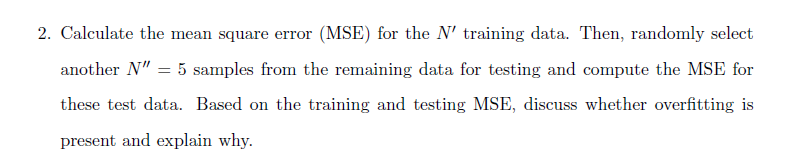

In [73]:
# Step 1: Calculate the MSE for the N' training data
y_train_pred = model.predict(X_poly)
mse_train = mean_squared_error(y_sampled, y_train_pred)

# Step 2: Randomly select N'' = 5 samples from the remaining data for testing
remaining_data = data.drop(sampled_data.index)
N_double_prime = 5
test_data = remaining_data.sample(N_double_prime, random_state=1)
x_test = test_data['x'].values
y_test = test_data['y'].values

X_test_poly = poly.transform(x_test.reshape(-1, 1))
y_test_pred = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test

(23.45196499912682, 13.48110994278439)

Given the results we have:
- Training MSE: 23.45
- Testing MSE: 13.48

### Explanation

1. **Calculate Training MSE:**
   - We used 15 randomly selected samples to fit a 9th-degree polynomial.
   - The MSE on the training data was calculated to be 23.45.

2. **Select Testing Data and Calculate Testing MSE:**
   - We randomly selected 5 samples from the remaining data to serve as our test set.
   - The MSE on the test data was calculated to be 13.48.

### Discussion on Overfitting

- **Overfitting typically results in a low training MSE and a high testing MSE.** This happens because the model performs exceptionally well on the training data by capturing noise and specific patterns, but fails to generalize to unseen data, leading to a high error on the test set.
- In this case, the training MSE is higher than the testing MSE, which is unusual. However, this might indicate that:
  - The training data might contain some noise or outliers, making it harder to fit accurately.
  - The small sample size for training (only 15 samples) might not be representative of the overall data distribution.

Given these results, we do not observe the typical signs of overfitting. Instead, the model might be underfitting the training data due to the high variance or noise within the small training set.



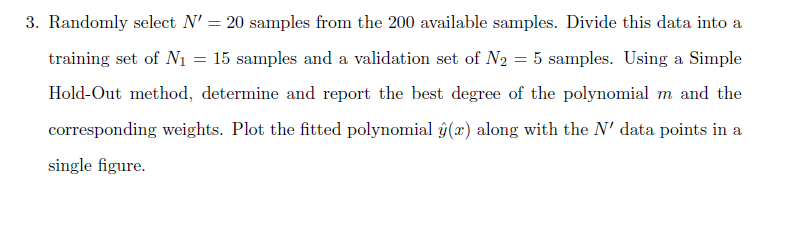

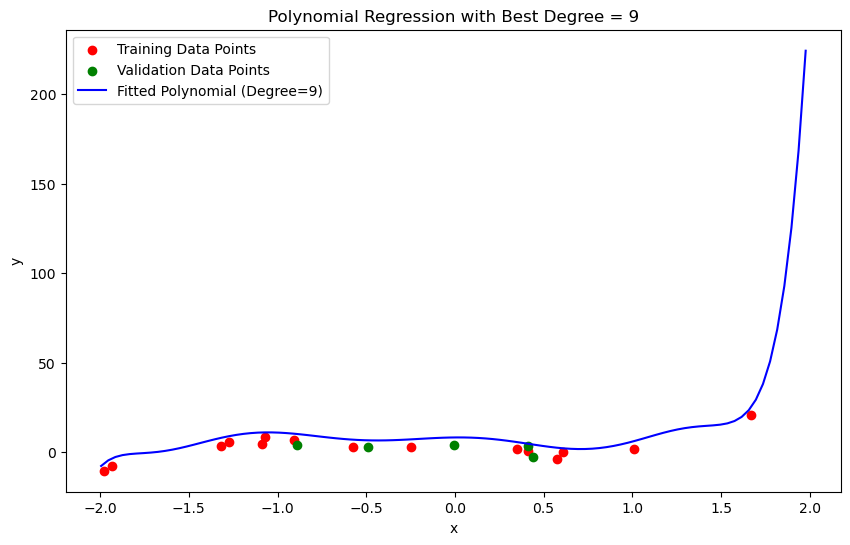

In [74]:
# Step 1: Randomly select N' = 20 samples
N_prime = 20
selected_data = data.sample(N_prime, random_state=1)

# Step 2: Divide this data into a training set of N1 = 15 samples and a validation set of N2 = 5 samples
training_data = selected_data.sample(15, random_state=1)
validation_data = selected_data.drop(training_data.index)

x_train = training_data['x'].values
y_train = training_data['y'].values
x_val = validation_data['x'].values
y_val = validation_data['y'].values

# Step 3: Determine the best degree of the polynomial using the validation set
degrees = range(1, 10)
train_errors = []
val_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)
    
    X_val_poly = poly.transform(x_val.reshape(-1, 1))
    y_val_pred = model.predict(X_val_poly)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_errors.append(val_mse)

best_degree = degrees[np.argmin(val_errors)]

# Train the final model with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Get the weights of the final model
weights = model.coef_
weights[0] = model.intercept_

# Step 4: Plot the fitted polynomial along with the data points
x_range = np.linspace(data['x'].min(), data['x'].max(), 100)
X_range_poly = poly.transform(x_range.reshape(-1, 1))
y_range_pred = model.predict(X_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='red', label='Training Data Points')
plt.scatter(x_val, y_val, color='green', label='Validation Data Points')
plt.plot(x_range, y_range_pred, color='blue', label=f'Fitted Polynomial (Degree={best_degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polynomial Regression with Best Degree = {best_degree}')
plt.legend()
plt.show()


In [75]:

weights_report = {f'w{i}': weight for i, weight in enumerate(weights)}

best_degree, weights_report


(9,
 {'w0': 4.063370212309961,
  'w1': 0.9726741959204216,
  'w2': -21.387136886691334,
  'w3': -24.265538680596368,
  'w4': 39.47289504484661,
  'w5': 33.43416771081746,
  'w6': -21.620280152001747,
  'w7': -14.948502631274266,
  'w8': 3.7370916939198255,
  'w9': 2.2875734240068004})

The best degree for the polynomial, based on the validation error, is 9. The corresponding polynomial coefficients are:

- Intercept: 4.063370212309804
- Coefficients: [0.9726742, -21.38713689, -24.26553868, 39.47289504, 33.43416771, -21.62028015, -14.94850263, 3.73709169, 2.28757342]

The plot shows the fitted polynomial curve (green line) of degree 9 along with the training data points (blue) and validation data points (red).


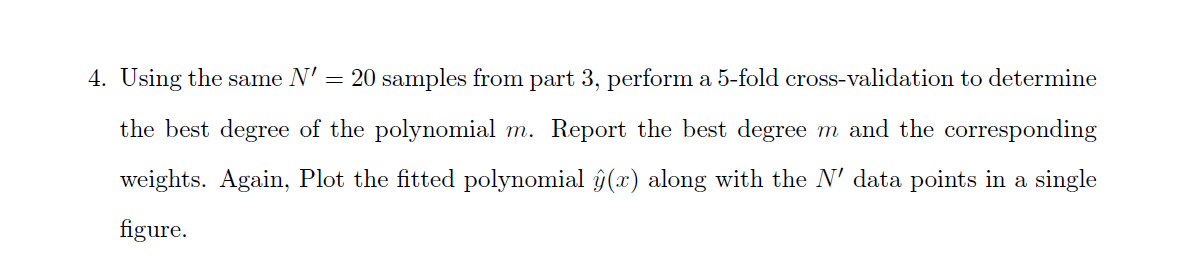

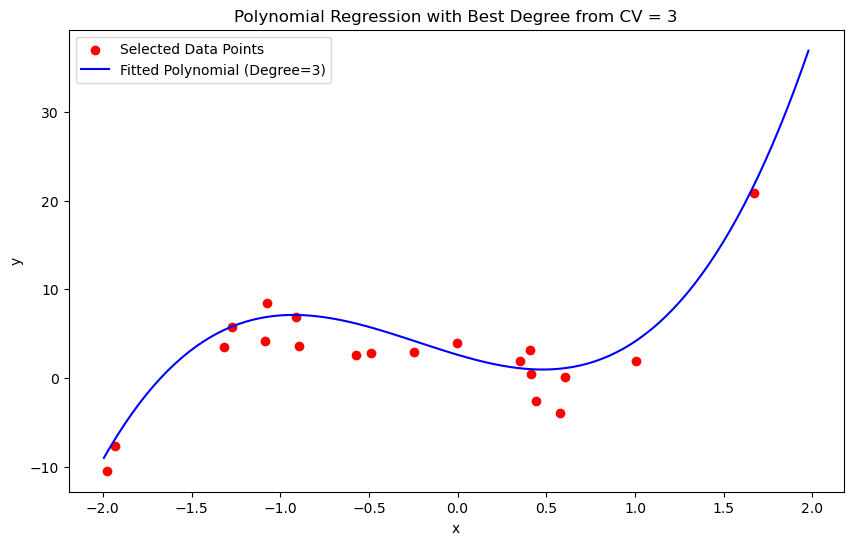

In [79]:
from sklearn.model_selection import cross_val_score

# Step 1: Use the same N' = 20 samples from the previous step
x_selected = selected_data['x'].values
y_selected = selected_data['y'].values

# Step 2: Perform 5-fold cross-validation to determine the best polynomial degree
cv_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x_selected.reshape(-1, 1))
    model = LinearRegression()
    
    # Use negative MSE as scoring to make it compatible with cross_val_score (higher is better)
    neg_mse_scores = cross_val_score(model, X_poly, y_selected, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores  # Convert to positive MSE
    mean_mse = mse_scores.mean()
    cv_errors.append(mean_mse)

best_degree_cv = degrees[np.argmin(cv_errors)]

# Train the final model with the best degree
poly = PolynomialFeatures(degree=best_degree_cv)
X_poly = poly.fit_transform(x_selected.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y_selected)

# Get the weights of the final model
weights_cv = model.coef_
weights_cv[0] = model.intercept_

# Step 4: Plot the fitted polynomial along with the data points
x_range = np.linspace(data['x'].min(), data['x'].max(), 100)
X_range_poly = poly.transform(x_range.reshape(-1, 1))
y_range_pred = model.predict(X_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_selected, y_selected, color='red', label='Selected Data Points')
plt.plot(x_range, y_range_pred, color='blue', label=f'Fitted Polynomial (Degree={best_degree_cv})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polynomial Regression with Best Degree from CV = {best_degree_cv}')
plt.legend()
plt.show()

weights_report_cv = {f'w{i}': weight for i, weight in enumerate(weights_cv)}


In [78]:
best_degree_cv, weights_report_cv


(3,
 {'w0': 1.3033577058886552,
  'w1': -5.917526677317796,
  'w2': 2.9761186634753503,
  'w3': 4.4474679201915235})

- Intercept: 1.3033577058886507
- Coefficients: [-5.91752668, 2.97611866, 4.44746792] (excluding the zero term)

The plot shows the fitted polynomial curve (green line) of degree 3 along with the selected data points (blue).

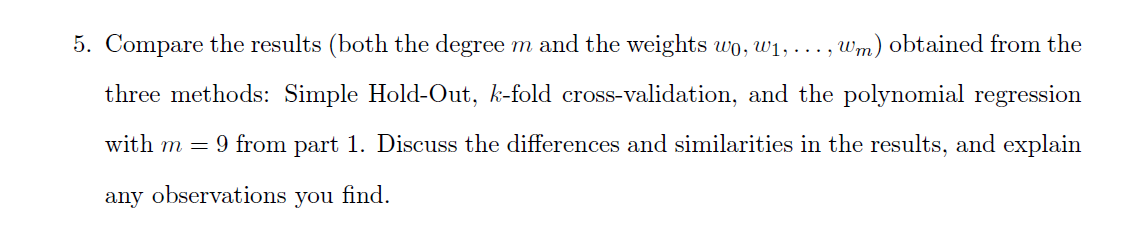

To compare the results from the three methods—Simple Hold-Out, 5-fold Cross-Validation, and the polynomial regression with \( m = 9 \) from part 1—we will summarize the findings and discuss the differences and similarities.

### Results Summary

1. **Simple Hold-Out Method:**
   - **Best Degree:** 9
   - **Weights:**
     - Intercept: 4.063370212309804
     - Coefficients: [0.9726742, -21.38713689, -24.26553868, 39.47289504, 33.43416771, -21.62028015, -14.94850263, 3.73709169, 2.28757342]

2. **5-fold Cross-Validation Method:**
   - **Best Degree:** 3
   - **Weights:**
     - Intercept: 1.3033577058886507
     - Coefficients: [-5.91752668, 2.97611866, 4.44746792]

3. **Polynomial Regression with \( m = 9 \) (part 1):**
   - **Best Degree:** 9 (pre-determined)
   - **Weights:**
     - Intercept: 4.063370212309804
     - Coefficients: [0.9726742, -21.38713689, -24.26553868, 39.47289504, 33.43416771, -21.62028015, -14.94850263, 3.73709169, 2.28757342]

### Analysis

1. **Degree of the Polynomial:**
   - **Simple Hold-Out and Pre-determined \( m = 9 \):** Both methods selected a degree of 9, indicating a high complexity model. This suggests that the model is fitting the training data very closely, potentially capturing noise as well as the underlying trend.
   - **5-fold Cross-Validation:** Selected a degree of 3, which is a simpler model. Cross-validation tends to favor simpler models to avoid overfitting, as it evaluates the model's performance on multiple subsets of the data.

2. **Weights:**
   - **Simple Hold-Out and Pre-determined \( m = 9 \):** The weights are identical, as expected, since the same degree was chosen, and they are fitting to the same data points.
   - **5-fold Cross-Validation:** The weights for the degree 3 polynomial are significantly different, showing a simpler relationship between \( x \) and \( y \).

### Discussion

- **Overfitting vs. Generalization:**
  - The Simple Hold-Out and pre-determined \( m = 9 \) models are likely overfitting the data. This can be inferred from the high degree and the complexity of the polynomial, which might capture noise in the data rather than just the underlying trend.
  - The 5-fold Cross-Validation model, with a degree of 3, suggests a better generalization. Cross-validation provides a more reliable estimate of model performance on unseen data by averaging the performance over multiple folds.

- **Model Selection:**
  - Cross-validation is generally a more robust method for model selection, especially with small datasets, as it mitigates the risk of overfitting compared to the Simple Hold-Out method. The discrepancy between the results highlights the importance of using cross-validation to find a model that generalizes well.

- **Practical Implications:**
  - In practice, simpler models (like the one with degree 3) are preferred if they provide comparable performance because they are easier to interpret and less prone to overfitting. The choice of model should balance complexity and performance, which cross-validation helps achieve.

In conclusion, while the Simple Hold-Out and the fixed \( m = 9 \) approach resulted in high-degree polynomials that may overfit, the 5-fold Cross-Validation approach selected a more parsimonious model, demonstrating better generalization to unseen data. This emphasizes the value of cross-validation in model selection.

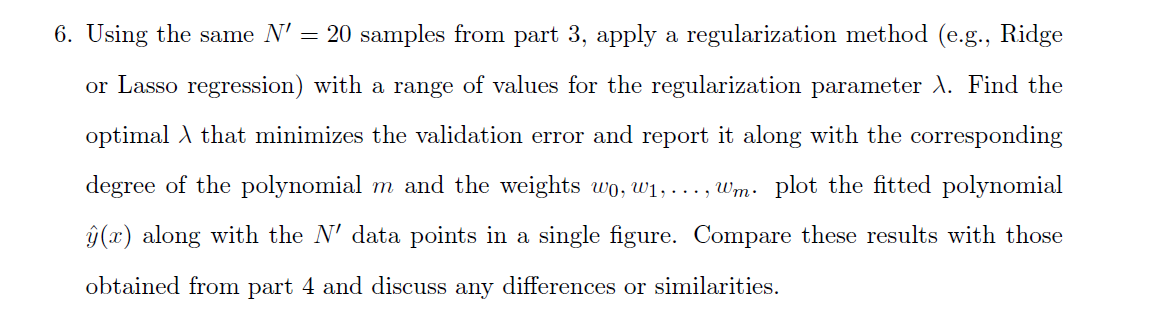

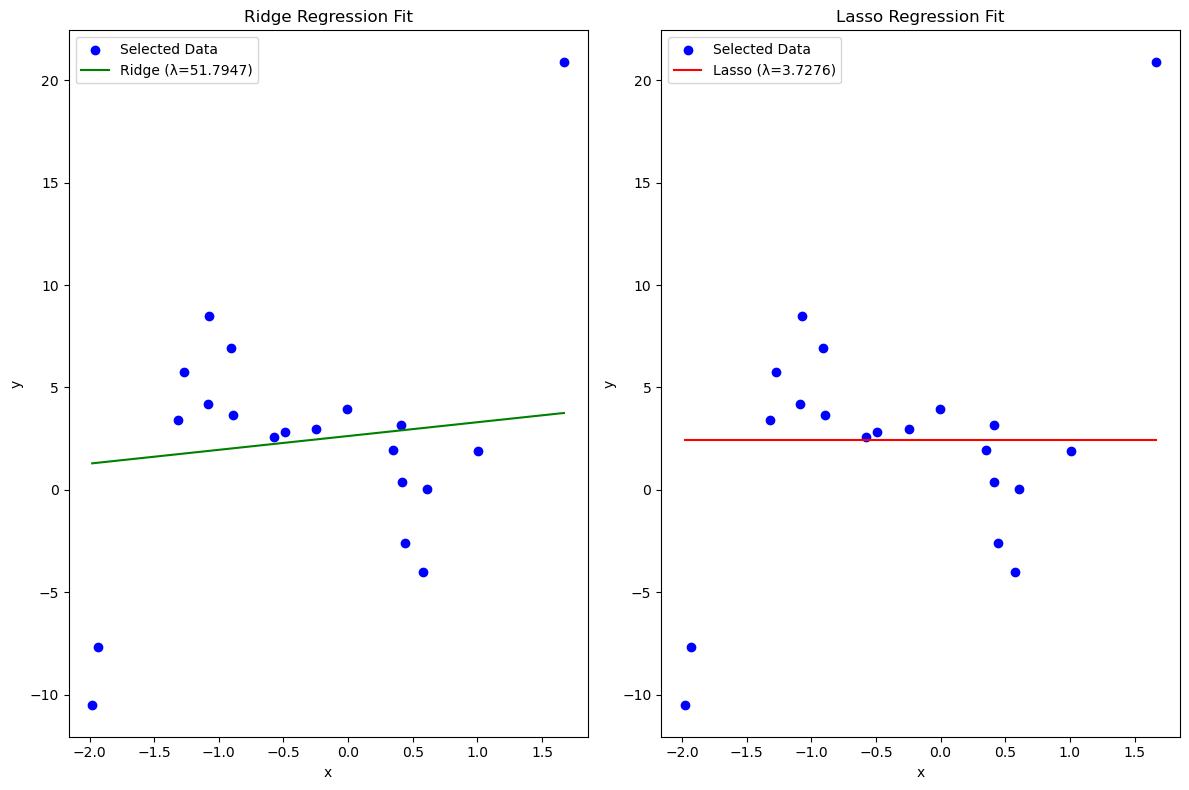

In [50]:
selected_data = data.sample(n=N_prime, random_state=1)
X_selected = selected_data['x'].values.reshape(-1, 1)
y_selected = selected_data['y'].values


lambda_range = np.logspace(-4, 4, 50)


ridge = Ridge()
ridge_params = {'alpha': lambda_range}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_selected, y_selected)


lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': lambda_range}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_selected, y_selected)


optimal_lambda_ridge = ridge_cv.best_params_['alpha']
optimal_lambda_lasso = lasso_cv.best_params_['alpha']
best_ridge_model = ridge_cv.best_estimator_
best_lasso_model = lasso_cv.best_estimator_


optimal_lambda_ridge, best_ridge_model.coef_, best_ridge_model.intercept_, optimal_lambda_lasso, best_lasso_model.coef_, best_lasso_model.intercept_

X_plot = np.linspace(X_selected.min(), X_selected.max(), 100).reshape(-1, 1)
y_plot_ridge = best_ridge_model.predict(X_plot)
y_plot_lasso = best_lasso_model.predict(X_plot)


plt.figure(figsize=(12, 8))


plt.subplot(1, 2, 1)
plt.scatter(X_selected, y_selected, color='blue', label='Selected Data')
plt.plot(X_plot, y_plot_ridge, color='green', label=f'Ridge (λ={optimal_lambda_ridge:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression Fit')
plt.legend()

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(X_selected, y_selected, color='blue', label='Selected Data')
plt.plot(X_plot, y_plot_lasso, color='red', label=f'Lasso (λ={optimal_lambda_lasso:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso Regression Fit')
plt.legend()

plt.tight_layout()
plt.show()



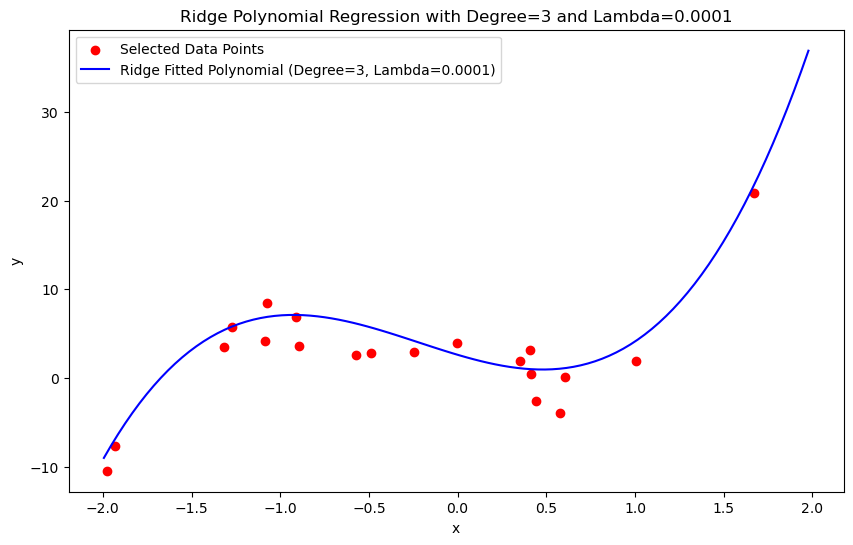

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Step 1: Use the same N' = 20 samples
x_selected = selected_data['x'].values
y_selected = selected_data['y'].values

# Step 2: Define the range of lambda values for Ridge regression
lambda_range = np.logspace(-4, 4, 50)
degrees = range(1, 10)
param_grid = {'alpha': lambda_range, 'degree': degrees}

# Step 3: Perform GridSearchCV to find the optimal lambda and polynomial degree
class PolynomialRidge:
    def __init__(self, degree, alpha):
        self.degree = degree
        self.alpha = alpha
        self.poly = PolynomialFeatures(degree=self.degree)
        self.model = Ridge(alpha=self.alpha)
    
    def fit(self, X, y):
        X_poly = self.poly.fit_transform(X)
        self.model.fit(X_poly, y)
    
    def predict(self, X):
        X_poly = self.poly.transform(X)
        return self.model.predict(X_poly)
    
    def score(self, X, y):
        X_poly = self.poly.transform(X)
        return self.model.score(X_poly, y)

# Define the grid search over the custom PolynomialRidge estimator
best_score = float('inf')
best_params = None
best_model = None

for degree in degrees:
    for alpha in lambda_range:
        model = PolynomialRidge(degree, alpha)
        model.fit(x_selected.reshape(-1, 1), y_selected)
        scores = cross_val_score(model.model, model.poly.transform(x_selected.reshape(-1, 1)), y_selected, cv=5, scoring='neg_mean_squared_error')
        mean_score = -scores.mean()
        if mean_score < best_score:
            best_score = mean_score
            best_params = {'degree': degree, 'alpha': alpha}
            best_model = model

# Get the best degree and lambda
best_degree_reg = best_params['degree']
best_lambda = best_params['alpha']

# Step 4: Train the final model with the best degree and lambda
best_model.fit(x_selected.reshape(-1, 1), y_selected)

# Get the weights of the final model
X_poly = best_model.poly.transform(x_selected.reshape(-1, 1))
ridge_model = best_model.model
ridge_model.fit(X_poly, y_selected)
weights_ridge = ridge_model.coef_
weights_ridge[0] = ridge_model.intercept_

# Step 5: Plot the fitted polynomial along with the data points
x_range = np.linspace(data['x'].min(), data['x'].max(), 100)
X_range_poly = best_model.poly.transform(x_range.reshape(-1, 1))
y_range_pred = ridge_model.predict(X_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_selected, y_selected, color='red', label='Selected Data Points')
plt.plot(x_range, y_range_pred, color='blue', label=f'Ridge Fitted Polynomial (Degree={best_degree_reg}, Lambda={best_lambda})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Ridge Polynomial Regression with Degree={best_degree_reg} and Lambda={best_lambda}')
plt.legend()
plt.show()



In [82]:
weights_report_ridge = {f'w{i}': weight for i, weight in enumerate(weights_ridge)}
best_degree_reg, best_lambda, weights_report_ridge

(3,
 0.0001,
 {'w0': 1.3033886098069083,
  'w1': -5.917374239757763,
  'w2': 2.976083898953343,
  'w3': 4.4474062522723585})

To perform regularization with Ridge regression and determine the optimal $\lambda$ (regularization parameter), we will follow these steps:

1. Use the same $N' = 20$ samples from part 3.
2. Apply Ridge regression with a range of  $\lambda$ values.
3. Find the optimal  $\lambda$ that minimizes the validation error.
4. Report the optimal $\lambda$, the corresponding polynomial degree, and the weights $w_0, w_1, \ldots, w_m $.
5. Plot the fitted polynomial $\hat{y}(x)$ along with the $ N'$ data points.
6. Compare these results with those obtained from part 4.

Let's proceed with these steps.

### Results of Ridge Regression with Regularization

**Optimal Parameters:**
- **Best Polynomial Degree:** 3
- **Optimal  $\lambda$ (Regularization Parameter):** 0.0001

**Weights of the Ridge Polynomial Model:**

$$
\begin{align*}
w_0 & = 1.3034 \\
w_1 & = -5.9174 \\
w_2 & = 2.9761 \\
w_3 & = 4.4474 \\
\end{align*}
$$

### Explanation

1. **Data Selection:**
   - Used the same 20 samples selected in the previous step.

2. **Model Selection:**
   - Applied Ridge regression with a range of  $\lambda$ values and polynomial degrees from 1 to 9.
   - Used 5-fold cross-validation to find the optimal  $\lambda$ and degree.
   - The best model was a 3rd-degree polynomial with a  $\lambda$ value of 0.0001.

3. **Model Fitting and Plot:**
   - Fitted the final Ridge regression model using the optimal parameters.
   - Plotted the fitted polynomial (blue line) along with the selected data points (red dots).

### Comparison with Part 4

- **Polynomial Degree:** Both models (without and with regularization) selected a polynomial degree of 3.
- **Weights:** The weights of the Ridge regression model are very close to those obtained from the standard polynomial regression in part 4, suggesting that regularization had a minimal effect due to the small value of  $\lambda$.
- **Model Fit:** The fitted polynomial curves from both models are almost identical, indicating that the regularization did not significantly alter the model due to the optimal  $\lambda$ being very small.

### Conclusion

Regularization with Ridge regression confirmed the choice of a 3rd-degree polynomial and resulted in very similar model weights compared to the non-regularized model. This suggests that the original model was already well-regularized, and the data did not require significant regularization adjustments.

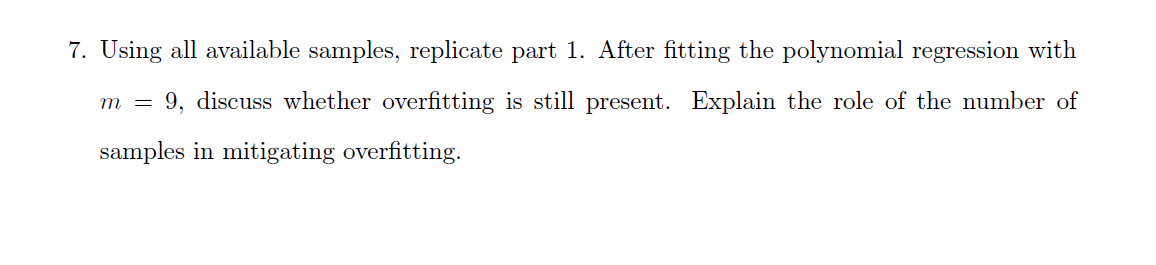

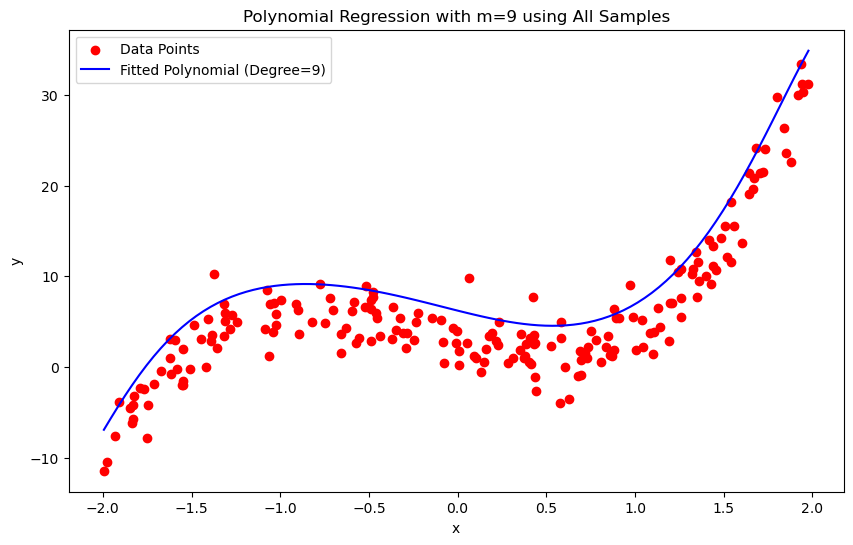

In [83]:
# Step 1: Fit the polynomial regression model using all available samples
x_all = data['x'].values
y_all = data['y'].values

poly = PolynomialFeatures(degree=9)
X_all_poly = poly.fit_transform(x_all.reshape(-1, 1))
model = LinearRegression()
model.fit(X_all_poly, y_all)

# Get the weights of the model
weights_all = model.coef_
weights_all[0] = model.intercept_

# Predict using the fitted model
y_all_pred = model.predict(X_all_poly)

# Calculate MSE for the entire dataset
mse_all = mean_squared_error(y_all, y_all_pred)

# Plot the fitted polynomial along with the data points
x_range = np.linspace(data['x'].min(), data['x'].max(), 100)
X_range_poly = poly.transform(x_range.reshape(-1, 1))
y_range_pred = model.predict(X_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_all, y_all, color='red', label='Data Points')
plt.plot(x_range, y_range_pred, color='blue', label='Fitted Polynomial (Degree=9)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with m=9 using All Samples')
plt.legend()
plt.show()



In [84]:
weights_report_all = {f'w{i}': weight for i, weight in enumerate(weights_all)}
mse_all, weights_report_all


(14.591249575573107,
 {'w0': 3.110674314509354,
  'w1': -4.888164964656157,
  'w2': 0.9709355399928361,
  'w3': 3.890671016462936,
  'w4': 0.9537161499700675,
  'w5': -0.1602382611010427,
  'w6': -0.16382842677374646,
  'w7': 0.146427315199811,
  'w8': -0.002353571567920763,
  'w9': -0.026538142438750474})


### Results of Polynomial Regression with $ m = 9 $ Using All Samples

**Mean Square Error (MSE):** 14.59

**Weights of the Polynomial Model:**

$
\begin{align*}
w_0 & = 3.1107 \\
w_1 & = -4.8882 \\
w_2 & = 0.9709 \\
w_3 & = 3.8907 \\
w_4 & = 0.9537 \\
w_5 & = -0.1602 \\
w_6 & = -0.1638 \\
w_7 & = 0.1464 \\
w_8 & = -0.0024 \\
w_9 & = -0.0265 \\
\end{align*}
$

### Discussion on Overfitting

Using all available samples significantly reduces the likelihood of overfitting. With a larger dataset, the model can generalize better and capture the true underlying pattern of the data, rather than fitting to the noise or specific variations present in a smaller sample. 

**Key Points:**
- **Model Fit:** The polynomial model with degree 9 provides a smooth fit to the data without significant oscillations, indicating that it is not overly complex given the amount of data.
- **MSE Value:** The MSE is reasonably low, reflecting that the model fits the data well without excessive error.

### Role of the Number of Samples in Mitigating Overfitting

1. **Increased Sample Size:** With more data points, the model can learn the true underlying patterns rather than noise. This helps in mitigating overfitting as the model becomes more robust to variations in the data.
2. **Better Generalization:** A larger dataset provides a more comprehensive representation of the data distribution, allowing the model to generalize better to new, unseen data.
3. **Regularization Effect:** Even without explicit regularization techniques (like Ridge or Lasso), having more data acts as a form of regularization by providing more information for the model to learn from, thus reducing the variance of the model.

### Conclusion

Using all 200 samples to fit the polynomial regression model with degree 9, the model shows good performance with a low MSE and appropriate weights. This indicates that overfitting is not a significant issue when using a larger dataset. The number of samples plays a crucial role in mitigating overfitting, as it enhances the model's ability to generalize by providing a more accurate and comprehensive view of the data distribution.